In [22]:
import numpy as np
import torch
import torch.nn as nn
from training import train
from NP import NP
import matplotlib.pyplot as plt
import torchaudio

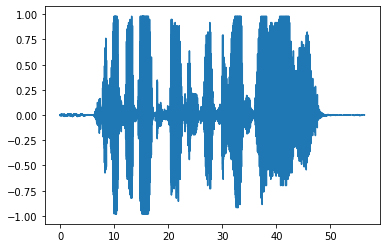

In [23]:
wav = torchaudio.load('./speechsamples/8khzrec1.wav')
linspace = np.linspace(0,56.273,28133)
plt.plot(linspace, wav[0].squeeze(0).numpy())

In [24]:
def generate_data(samples, fun_size, increment):
    sampledata = []
    for sample, _ in samples:
        sample_size = list(sample.size())[1]
        linspace = torch.linspace(0, sample_size/1000, sample_size)
        sample = sample.squeeze(0)
        for i in range(sample_size//increment):
            sampledata.append([linspace[0: fun_size].unsqueeze(0).transpose(0,1), sample[i*increment: i*increment+fun_size].unsqueeze(0).transpose(0,1)])
        return sampledata

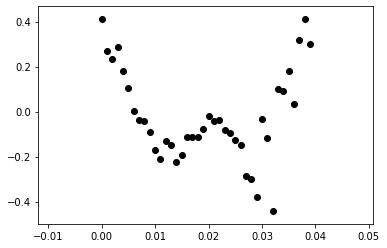

In [25]:
data = generate_data([wav], 40, 20)
testpoints = data[700]
plt.scatter(testpoints[0], testpoints[1], c='black')

In [33]:
model = NP(3, 1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

In [34]:
def sample_plot(np, context, linspace):
    context_x = context[0]
    context_y = context[1]
    
    mu, sigma, log_p, en_dist, t_en_dist, MSE  = np(context_x, context_y, linspace)
    low = mu-sigma
    high = mu+sigma
    plt.plot(linspace.transpose(0,1).squeeze().numpy(), mu.transpose(0,1).squeeze().detach().numpy())
    plt.fill_between(linspace.transpose(0,1).squeeze().numpy(), low.transpose(0,1).squeeze().detach().numpy(), high.transpose(0,1).squeeze().detach().numpy(), facecolor='#65c9f7', interpolate=True)
    plt.scatter(context[0], context[1], c='black')
    
def variance_plot(np, context, linspace):
    context_x = context[0]
    context_y = context[1]
    mu, sigma, log_p, en_dist, t_en_dist, MSE  = np(context_x, context_y, linspace)
    plt.plot(linspace.transpose(0,1).squeeze().numpy(), sigma.transpose(0,1).squeeze().detach().numpy(),  c = 'r')

0
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 1.5682542324066162.
EPOCH LOSS 1.5682542324066162
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.3430485129356384...
EPOCH LOSS 0.3430485129356384
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.012503841891884804..
EPOCH LOSS 0.012503841891884804
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.8798208236694336...
EPOCH LOSS 0.8798208236694336
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 1.641098976135254...
EPOCH LOSS 1.641098976135254
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.1517493724

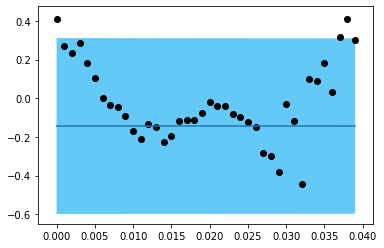

10
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.11723000556230545..
EPOCH LOSS -0.11723000556230545
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.1099792867898941..
EPOCH LOSS -0.1099792867898941
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.2520243525505066.
EPOCH LOSS -0.2520243525505066
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.4848494529724121.
EPOCH LOSS -0.4848494529724121
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.21389563381671906.
EPOCH LOSS -0.21389563381671906
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.20

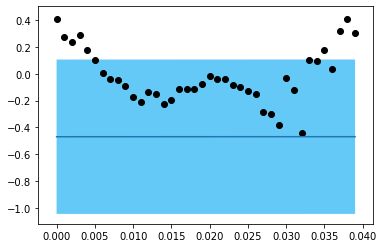

20
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.7078598737716675.
EPOCH LOSS 0.7078598737716675
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.6685082912445068.
EPOCH LOSS 0.6685082912445068
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.6278421878814697.
EPOCH LOSS 0.6278421878814697
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.6113667488098145.
EPOCH LOSS 0.6113667488098145
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.5899468660354614.
EPOCH LOSS 0.5899468660354614
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.5537828803062439.
E

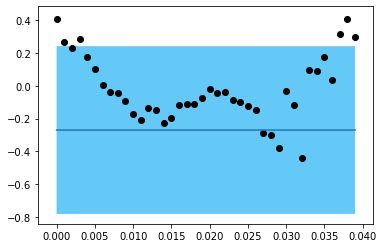

30
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.4069358706474304.
EPOCH LOSS 0.4069358706474304
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.26724904775619507.
EPOCH LOSS 0.26724904775619507
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.14458222687244415..
EPOCH LOSS -0.14458222687244415
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.30874621868133545.
EPOCH LOSS 0.30874621868133545
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.24990884959697723.
EPOCH LOSS -0.24990884959697723
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.041431

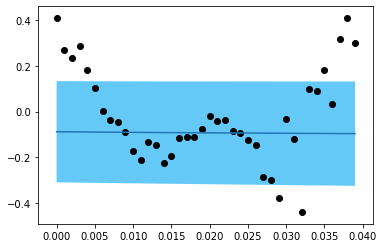

40
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.2419675886631012.
EPOCH LOSS -0.2419675886631012
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.3164604902267456.
EPOCH LOSS -0.3164604902267456
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.17472121119499207.
EPOCH LOSS -0.17472121119499207
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.22709158062934875.
EPOCH LOSS -0.22709158062934875
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.35170772671699524.
EPOCH LOSS -0.35170772671699524
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.34

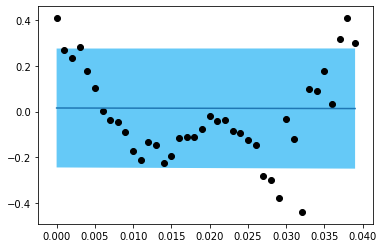

50
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.028066232800483704.
EPOCH LOSS 0.028066232800483704
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.38626551628112793.
EPOCH LOSS -0.38626551628112793
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.2625911235809326.
EPOCH LOSS -0.2625911235809326
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.25025674700737...
EPOCH LOSS -0.25025674700737
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.31477174162864685.
EPOCH LOSS -0.31477174162864685
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.3369

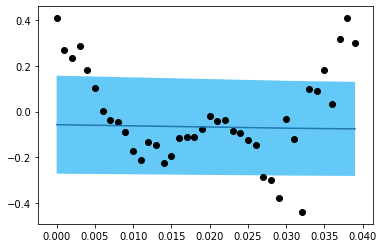

60
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.31970179080963135.
EPOCH LOSS -0.31970179080963135
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.457927942276001..
EPOCH LOSS -0.457927942276001
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.3143799901008606.
EPOCH LOSS -0.3143799901008606
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.2170090228319168.
EPOCH LOSS -0.2170090228319168
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.34917908906936646.
EPOCH LOSS -0.34917908906936646
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.42073

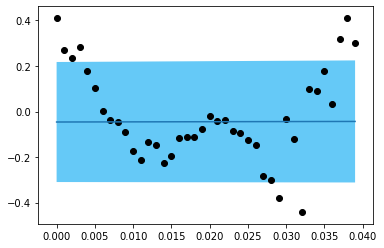

70
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.3474496304988861.
EPOCH LOSS -0.3474496304988861
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.4871121346950531.
EPOCH LOSS -0.4871121346950531
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.3285602927207947.
EPOCH LOSS -0.3285602927207947
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.3104398250579834.
EPOCH LOSS -0.3104398250579834
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.1589260846376419...
EPOCH LOSS -0.1589260846376419
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.257966

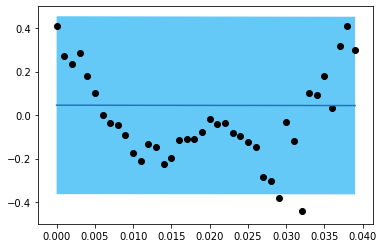

80
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.01156226359307766..
EPOCH LOSS -0.01156226359307766
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.09308283030986786..
EPOCH LOSS 0.09308283030986786
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = 0.06272600591182709.
EPOCH LOSS 0.06272600591182709
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.12929211556911469.
EPOCH LOSS -0.12929211556911469
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.28168022632598877.
EPOCH LOSS -0.28168022632598877
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.

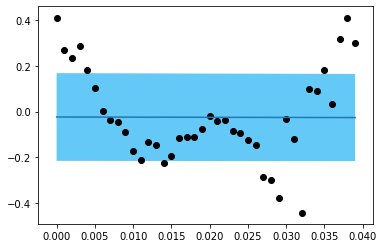

90
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.38232138752937317.
EPOCH LOSS -0.38232138752937317
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.44534265995025635.
EPOCH LOSS -0.44534265995025635
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = -0.4772333800792694.
EPOCH LOSS -0.4772333800792694
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan.2862777709961..
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: 

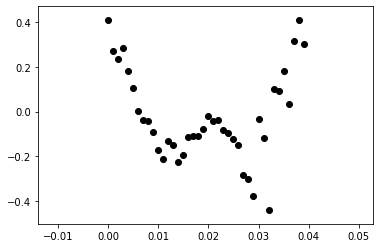

100
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

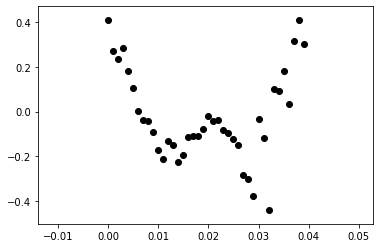

110
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

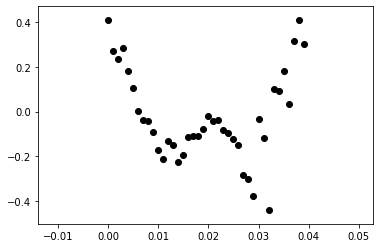

120
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

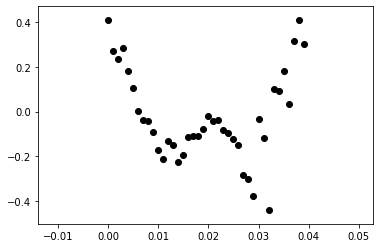

130
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

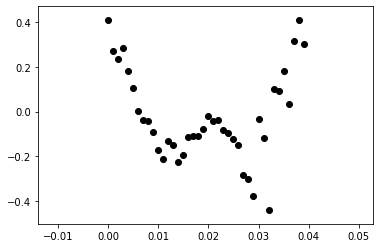

140
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

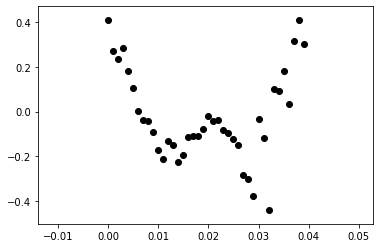

150
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

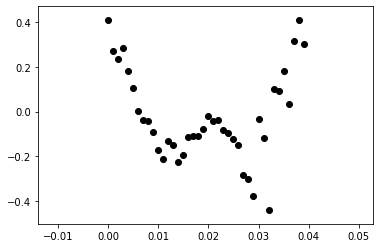

160
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

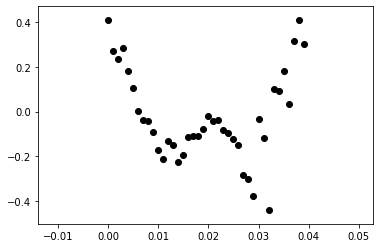

170
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

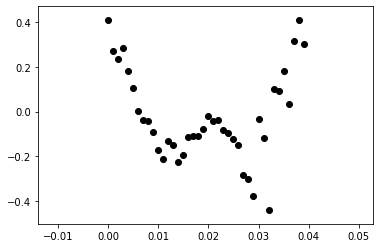

180
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

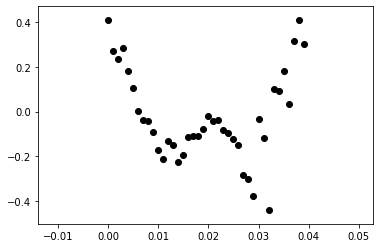

190
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 6 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 100. Average loss = nan. Complete
EPOCH LOSS nan
Epoch 7 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iterati

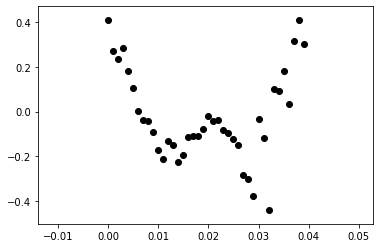

In [35]:

optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)
alpha = 0
for i in range(20):
    print(10*i)
    train(data[700:800], model, 10, 10, alpha, optimizer)
    sample_plot(model, testpoints, testpoints[0])
    #variance_plot(model, testpoints, testpoints[1])
    plt.show()